In [1]:
from keras.datasets import cifar10
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import save_img
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from numpy import argmax, array

from keras.losses import categorical_crossentropy

Using TensorFlow backend.


# Programming Questions

## Dataset 1 

### Load and Split Data

In [2]:
spam_data = pd.read_csv('communities.csv', header = None)
spam_data

0   1      2                    3    4     5     6     7     8     9    \
0       8   ?      ?         Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12   
1      53   ?      ?          Tukwilacity    1  0.00  0.16  0.12  0.74  0.45   
2      24   ?      ?         Aberdeentown    1  0.00  0.42  0.49  0.56  0.17   
3      34   5  81440  Willingborotownship    1  0.04  0.77  1.00  0.08  0.12   
4      42  95   6096    Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09   
...   ...  ..    ...                  ...  ...   ...   ...   ...   ...   ...   
1989   12   ?      ?    TempleTerracecity   10  0.01  0.40  0.10  0.87  0.12   
1990    6   ?      ?          Seasidecity   10  0.05  0.96  0.46  0.28  0.83   
1991    9   9  80070        Waterburytown   10  0.16  0.37  0.25  0.69  0.04   
1992   25  17  72600          Walthamcity   10  0.08  0.51  0.06  0.87  0.22   
1993    6   ?      ?          Ontariocity   10  0.20  0.78  0.14  0.46  0.24   

      ...   118   119   120   121   122   123  124   125   126   127  
0     ...  0.12  0.26  0.20  0.06  0.04   0.9  0.5  0.32  0.14  0.20  
1     ...  0.02  0.12  0.45     ?     ?     ?    ?  0.00     ?  0.67  
2     ...  0.01  0.21  0.02     ?     ?     ?    ?  0.00     ?  0.43  
3     ...  0.02  0.39  0.28     ?     ?     ?    ?  0.00     ?  0.12  
4     ...  0.04  0.09  0.02     ?     ?     ?    ?  0.00     ?  0.03  
...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...  
1989  ...  0.01  0.28  0.05     ?     ?     ?    ?  0.00     ?  0.09  
1990  ...  0.02  0.37  0.20     ?     ?     ?    ?  0.00     ?  0.45  
1991  ...  0.08  0.32  0.18  0.08  0.06  0.78    0  0.91  0.28  0.23  
1992  ...  0.03  0.38  0.33  0.02  0.02  0.79    0  0.22  0.18  0.19  
1993  ...  0.11  0.30  0.05  0.08  0.04  0.73  0.5  1.00  0.13  0.48  

[1994 rows x 128 columns]

### Split the data in training, evalatuation and testing data

    - TRAINING DATA (60%) :  1196 EXAMPLES
    - EVALUATION DATA (20%) : 399 EXAMPLES
    - TESTING DATA (20%) : 399 EXAMPLES 

In [3]:
coef_test = 0.2
coef_eval = 0.2

### Load_crime_data

In [4]:
def load_crime_data(spam_data,coef_test,coef_eval):
    
    # GET RID OF THE EMPHY DATA
    
    spam_data = spam_data.values
    x_spam_data = spam_data[:,5:-1]
    y_spam_data = spam_data[:,-1]
    y_spam_data = y_spam_data.astype('float32')
    
    selec_int_x = (x_spam_data == '?')
    selec_int_x = sum(selec_int_x)
    
    selec_int_column = (selec_int_x == 1675)
    x_spam_data = x_spam_data[:,~selec_int_column]
    
    selec_int_x_2 = (x_spam_data == '?')
    x_spam_data[selec_int_x_2] = 0.28
    
    num_data = len(x_spam_data)
    num_data_test = round (num_data * coef_test)
    num_data_eval = round (num_data * coef_eval)
        
    
    # TEST DATA: DIVIDE FROM THE DATA 

    x_spam_data_test = x_spam_data[num_data - num_data_test:,:]
    y_spam_data_test = y_spam_data[num_data - num_data_test:]
    
    # TRAIN DATA: FIRST NORMALIZE AND THEN DIVIDE IN EVALUATION AND TRAINING DATA
    
    x_spam_data_train = x_spam_data[0:num_data - num_data_test,:]
    y_spam_data_train = y_spam_data[0:num_data - num_data_test]
    x_spam_data_train = x_spam_data_train.astype('float32') 
    x_spam_data_train_mean = x_spam_data_train.astype('float32').mean(axis=0)
    x_spam_data_train -= x_spam_data_train_mean
    x_spam_data_train_std = x_spam_data_train.std(axis = 0)
    x_spam_data_train /= x_spam_data_train_std
    
    x_spam_data_eval = x_spam_data_train[len(x_spam_data_train) - num_data_eval:len(x_spam_data_train),:]
    y_spam_data_eval = y_spam_data_train[len(x_spam_data_train) - num_data_eval:len(x_spam_data_train)]
    m = len(x_spam_data_train)
    x_spam_data_train = x_spam_data_train[0:m - num_data_eval,:]
    y_spam_data_train = y_spam_data_train[0:m - num_data_eval]
    
    # NORMALIZE A THE TEST DATA
    
    x_spam_data_test = x_spam_data_test.astype('float32') 
    x_spam_data_test -= x_spam_data_train_mean
    x_spam_data_test /= x_spam_data_train_std
    
    return x_spam_data_test,y_spam_data_test,x_spam_data_eval,y_spam_data_eval,x_spam_data_train,y_spam_data_train
    

In [5]:
x_com_data_test,y_com_data_test,x_com_data_eval,y_com_data_eval,x_com_data_train,y_com_data_train = load_crime_data(spam_data,coef_test,coef_eval)

### Models

In [6]:
def create_model(model_name):
    if model_name==1:
        
        model1 = Sequential()
        model1.add(Dense(128,activation='relu'))
        model1.add(Dense(64,activation='relu'))
        model1.add(Dense(32,activation='relu'))
        model1.add(Dense(16,activation='relu'))
        model1.add(Dense(units=1))
        return model1
    
    if model_name==2:
        
        model1 = Sequential()
        model1.add(Dense(64,activation='relu'))
        model1.add(Dense(64,activation='relu'))
        model1.add(Dense(32,activation='relu'))
        model1.add(Dense(16,activation='relu'))
        model1.add(Dense(units=1))
        return model1
    
    if model_name==3:
        
        model1 = Sequential()
        model1.add(Dense(128,activation='relu'))
        model1.add(Dense(64,activation='relu'))
        model1.add(Dense(64,activation='relu'))
        model1.add(Dense(32,activation='relu'))
        model1.add(Dense(16,activation='relu'))
        model1.add(Dense(units=1))
        return model1

In [12]:
def bestModel(regularization):

    model3 = Sequential(name='Best_Model')
    model3.add(Dense(128))

    if regularization == 'batchN': # Just Batch Normalization

        model3.add(BatchNormalization())
        model3.add(Activation('relu'))
        model3.add(Dense(64,activation='relu'))
        model3.add(Dense(32,activation='relu'))
        model3.add(Dense(16,activation='relu'))
        model3.add(Dense(units=1))
        return model3

    if regularization == 'dropout': # Batch Normalization + Dropout

        model3.add(BatchNormalization())
        model3.add(Activation('relu'))
        model3.add(Dense(64,activation='relu'))
        model3.add(Dropout(0.5))
        model3.add(Dense(32,activation='relu'))
        model3.add(Dense(16,activation='relu'))
        model3.add(Dense(units=1))
        return model3

    if regularization == 'weightDecay': # Batch Normalization + Dropout + Weight Decay

        model3.add(BatchNormalization())
        model3.add(Activation('relu'))
        model3.add(Dense(64,activation='relu'))
        model3.add(Dropout(0.5))
        model3.add(Dense(32,activation='relu'))
        model3.add(Dense(16,activation='relu',kernel_regularizer='l2'))
        model3.add(Dense(units=1))
        return model3

### Evaluation

In [8]:
def modelEvaluation(modelID,optimizer='adam',loss = 'mse',epochs=16,batch_size=32,best_model = False, regularization = 'batchN', plot=True):

    if best_model:
        model = bestModel(regularization=regularization)
    else:
        model = create_model(modelID)
    
    model.compile(optimizer=optimizer,loss=loss,metrics=['mae'])
  
    hist = model.fit(x_com_data_train, y_com_data_train, validation_data=(x_com_data_eval, y_com_data_eval), epochs=epochs,verbose=0,batch_size=batch_size)
    hist.history
    
    if(plot):
        #Visualize the models accuracy
        plt.plot(hist.history['mae'])
        plt.plot(hist.history['val_mae'])
        plt.title('MAE {}'.format(model.name))
        plt.ylabel('MAE')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='upper left')
        plt.show()

        #Visualize the models loss
        plt.plot(hist.history['loss'])
        plt.plot(hist.history['val_loss'])
        plt.title('Loss {}'.format(model.name))
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='upper left')
        plt.show()
    
    loss_train = hist.history['loss'][-1]
    mae_train = hist.history['mae'][-1]
    loss_val = hist.history['val_loss'][-1]
    mae_val = hist.history['val_mae'][-1]
    
    print("Loss-> Train Set:{:.2f}; Test Set:{:.2f} (Diff: {:2f})".format(loss_train,loss_val,abs(loss_train-loss_val)))
    print("MAE-> Train Set:{:.2f}; Test Set:{:.2f} (Diff: {:2f})".format(mae_train,mae_val,abs(mae_train-mae_val)))
    
    return loss_train, mae_train, loss_val, mae_val
    
    
    

In [9]:
modelEvaluation(modelID=1)

Loss-> Train Set:0.00; Test Set:0.02 (Diff: 0.018519)
MAE-> Train Set:0.04; Test Set:0.10 (Diff: 0.061478)


(0.0036132898326514656, 0.04132838, 0.022131912522298052, 0.102806024)

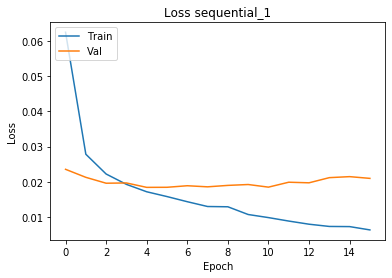

Loss-> Train Set:0.01; Test Set:0.02 (Diff: 0.014619)
MAE-> Train Set:0.06; Test Set:0.10 (Diff: 0.045844)


(0.0063510268060708525, 0.057671096, 0.020970160645761883, 0.10351464)

In [10]:
modelEvaluation(modelID=2)

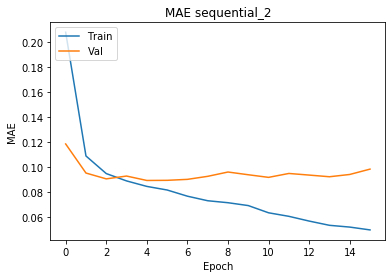

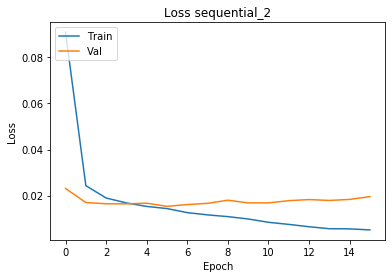

Loss-> Train Set:0.01; Test Set:0.02 (Diff: 0.014461)
MAE-> Train Set:0.05; Test Set:0.10 (Diff: 0.048801)


(0.005056240771862875, 0.04938976, 0.019516777807384506, 0.0981907)

In [11]:
modelEvaluation(modelID=3)

### Optimizers , epochs & Batch Sizes

In [13]:
epochs = [32,64]
batch_sizes = [32,128,256]
optimizers = ['sgd','RMSprop','adagrad','adam','adadelta','adamax','nadam']

In [14]:
results = pd.DataFrame(columns=['Optimizer','epochs','batch_sizes','loss_train', 'acc_train', 'loss_val', 'acc_val'])
results

Empty DataFrame
Columns: [Optimizer, epochs, batch_sizes, loss_train, acc_train, loss_val, acc_val]
Index: []

In [15]:
for optimizer in optimizers:
    for epoch in epochs:
        for batch_size in batch_sizes:
            loss_train, acc_train, loss_val, acc_val = modelEvaluation(modelID=1,loss='mse',optimizer=optimizer,epochs=epoch,batch_size=batch_size,plot=False)
            results = results.append({'Optimizer':optimizer,'epochs':epoch,'batch_sizes':batch_size,'loss_train':loss_train, 'acc_train':acc_train, 'loss_val':loss_val, 'acc_val':acc_val},ignore_index=True)

Loss-> Train Set:0.02; Test Set:0.02 (Diff: 0.001161)
MAE-> Train Set:0.09; Test Set:0.10 (Diff: 0.007526)
Loss-> Train Set:0.03; Test Set:0.03 (Diff: 0.004354)
MAE-> Train Set:0.12; Test Set:0.12 (Diff: 0.005999)
Loss-> Train Set:0.03; Test Set:0.02 (Diff: 0.003986)
MAE-> Train Set:0.12; Test Set:0.12 (Diff: 0.003898)
Loss-> Train Set:0.01; Test Set:0.02 (Diff: 0.008108)
MAE-> Train Set:0.08; Test Set:0.11 (Diff: 0.027358)
Loss-> Train Set:0.02; Test Set:0.03 (Diff: 0.004134)
MAE-> Train Set:0.11; Test Set:0.12 (Diff: 0.011337)
Loss-> Train Set:0.03; Test Set:0.03 (Diff: 0.000799)
MAE-> Train Set:0.12; Test Set:0.12 (Diff: 0.001862)
Loss-> Train Set:0.00; Test Set:0.02 (Diff: 0.019912)
MAE-> Train Set:0.04; Test Set:0.10 (Diff: 0.063729)
Loss-> Train Set:0.00; Test Set:0.02 (Diff: 0.017250)
MAE-> Train Set:0.04; Test Set:0.10 (Diff: 0.058944)
Loss-> Train Set:0.00; Test Set:0.02 (Diff: 0.018032)
MAE-> Train Set:0.04; Test Set:0.11 (Diff: 0.067484)
Loss-> Train Set:0.00; Test Set:0.02 

In [16]:
results.loc[results['acc_val'].idxmin(),:]

Optimizer           adam
epochs                32
batch_sizes          256
loss_train     0.0119188
acc_train      0.0743154
loss_val       0.0183562
acc_val        0.0970704
Name: 20, dtype: object

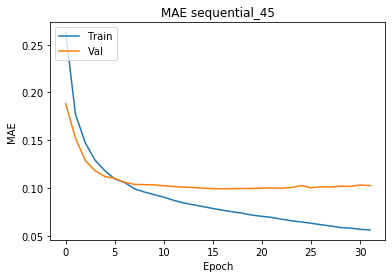

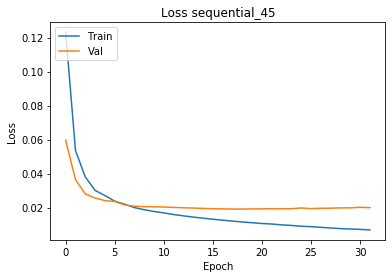

Loss-> Train Set:0.01; Test Set:0.02 (Diff: 0.013088)
MAE-> Train Set:0.06; Test Set:0.10 (Diff: 0.046319)


(0.006827867661531155, 0.056134883, 0.019915383402491573, 0.102453455)

In [17]:
modelEvaluation(modelID=1,loss='mse',optimizer='adam',epochs=32,batch_size=256)

### Regularization

In [18]:
def ensembleModel(optimizer='adam',loss = 'mae',epochs=16,batch_size=32, regularization = 'batchN',members = 10):

    models = []
    for i in range(members): # Fit
        model = bestModel(regularization=regularization)
        model.compile(optimizer=optimizer, loss=loss, metrics=['mae'])
        model.fit(x_train, y_train, epochs=epochs,verbose=0,batch_size=batch_size)
        models.append(model)
    
   

    # Train Set
    y_prob = [model.predict(x_train) for model in models]
    y_prob = np.array(y_prob)

    y_prob_sum = np.sum(y_prob, axis=0) # sum across ensemble members

    y_pred = argmax(y_prob_sum, axis=1)
    y_pred = to_categorical(y_pred)

    acc_train = accuracy_score(y_train,y_pred)

    # Validation Set
    y_prob = [model.predict(x_val) for model in models]
    y_prob = np.array(y_prob)

    y_prob_sum = np.sum(y_prob, axis=0) # sum across ensemble members

    y_pred = argmax(y_prob_sum, axis=1)
    y_pred = to_categorical(y_pred)

    acc_val = accuracy_score(y_val,y_pred)
    

    

    return models, acc_train, acc_val

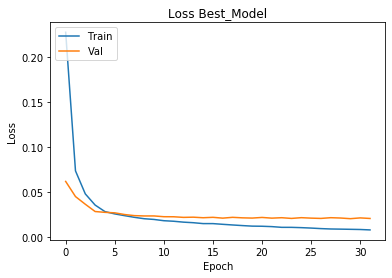

Loss-> Train Set:0.01; Test Set:0.02 (Diff: 0.012709)
MAE-> Train Set:0.06; Test Set:0.10 (Diff: 0.042909)


In [19]:
# Batch Normalization
model = modelEvaluation(best_model=True,loss='mse',optimizer='adam',modelID=1,regularization='batchN',epochs=32,batch_size=256)

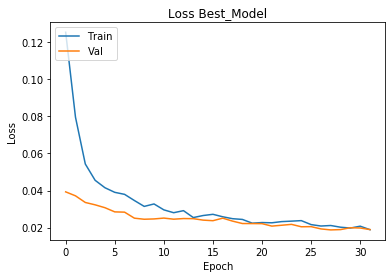

Loss-> Train Set:0.02; Test Set:0.02 (Diff: 0.000067)
MAE-> Train Set:0.10; Test Set:0.09 (Diff: 0.004514)


In [20]:
# Batch Normalization + Dropout
model = modelEvaluation(best_model=True,loss='mse',optimizer='adam',modelID=3,regularization='dropout',epochs=32,batch_size=256)

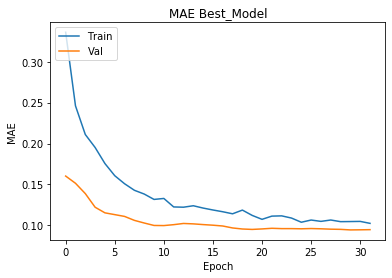

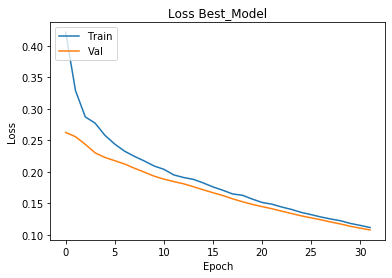

Loss-> Train Set:0.11; Test Set:0.11 (Diff: 0.003781)
MAE-> Train Set:0.10; Test Set:0.09 (Diff: 0.007706)


In [21]:
# Batch Normalization + Dropout + Weight Decay
model = modelEvaluation(best_model=True,loss='mse',optimizer='adam',modelID=2,regularization='weightDecay',epochs=32,batch_size=256)

### Load Model

In [22]:
# load json and create model
json_file = open('model_regression.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model_regression.h5")
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

### Test Set 

In [25]:
model = bestModel(regularization='dropout')
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.fit(x_com_data_train, y_com_data_train, validation_data=(x_com_data_eval, y_com_data_eval), epochs=32,verbose=0,batch_size=256)

#Test the model
score = model.evaluate(x_com_data_test,y_com_data_test)
print("MSE in Test Set: {:.2f}".format(score[0]))
print("MAE in Test Set: {:.2f}".format(score[1]))

399/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

MSE in Test Set: 0.02
MAE in Test Set: 0.10


### Save Model

In [87]:
# serialize model to JSON
model_json = model.to_json()
with open("model_regression.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model_regression.h5")
print("Saved model to disk")

Saved model to disk
